In [1]:
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
from matplotlib.patches import Rectangle

sns.set_style('whitegrid', {'xtick.color': '.15',
 'xtick.direction': u'in',
 'xtick.major.size': 10,
 'xtick.minor.size': 1,
 'ytick.color': '.15',
 'ytick.direction': u'in',
 'ytick.major.size': 10,
 'ytick.minor.size': 0.1,
 'grid.color': '.8',
 'axes.edgecolor': '.4',
 'grid.linestyle': u'--',
 'axes.linewidth': 1.0,
 'grid.linewidth': 0.5})

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

paired = sns.color_palette("Paired", 10)

rho_ice = 917.
rho_ow = 1028.
hydrostatic_factor = (1+rho_ice/(rho_ow - rho_ice))

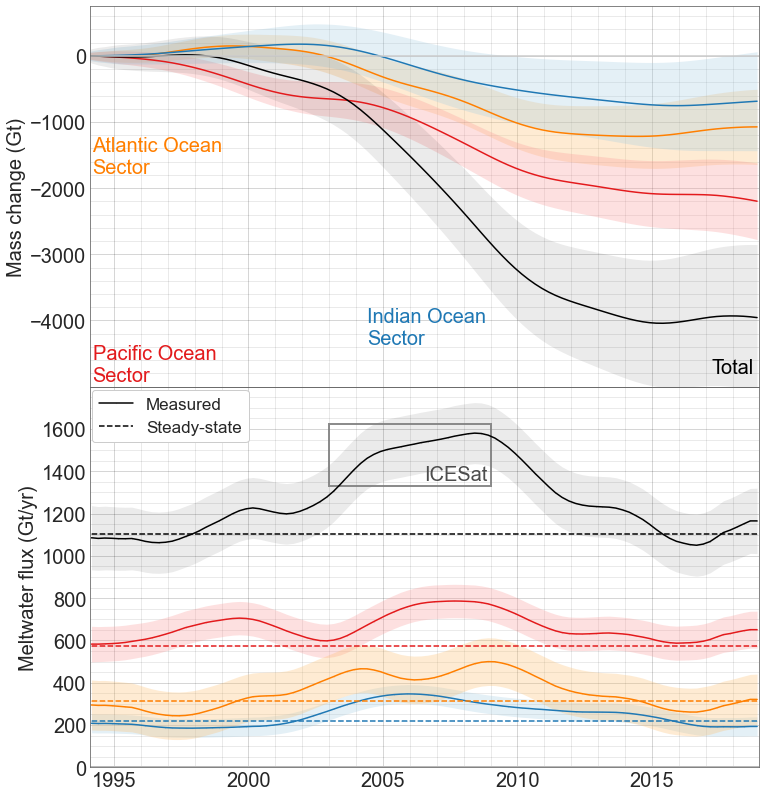

In [2]:
f = plt.figure()
f.set_size_inches(12, 14)

plt.subplots_adjust(hspace=0.001)
plt.subplots_adjust(wspace=0)

dat = sio.loadmat('../data/figure_3/ra_all_iceshelf_wb_averages_filter')
time = dat['t']
time_icesat = np.linspace(2003,2009,10)

ax5 = plt.subplot2grid((2,1),(1,0),rowspan=1,colspan=1)
area = dat['wb_ra_pacific_area']
ts = np.squeeze(dat['wb_ra_pacific']); ts_2sig = np.squeeze(dat['wb_ra_pacific_se'])
ax5.plot(time,np.squeeze(ts),color=paired[5],marker='.',markersize=0.1)
ax5.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts+ts_2sig)), np.array(np.squeeze(ts-ts_2sig)),
    alpha=0.3, edgecolor=paired[4], facecolor=paired[4], linewidth=0)
ts = dat['wb_ra_pacific_steady'];
ax5.plot(time,np.squeeze(ts),color=paired[5],marker='.',markersize=0.1,linestyle='--')
ax5.set_xlim(1994.1,2019)
plt.ylabel('Basal melt rate ($m a^{-1}$)')
ax5.axhline(y=0,color=(0.5,0.5,0.5))

area = dat['wb_ra_indian_area']
ts = np.squeeze(dat['wb_ra_indian']); ts_2sig = np.squeeze(dat['wb_ra_indian_se'])
ax5.plot(time,np.squeeze(ts),color=paired[1],marker='.',markersize=0.1)
ax5.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts+ts_2sig)), np.array(np.squeeze(ts-ts_2sig)),
    alpha=0.3, edgecolor=paired[0], facecolor=paired[0], linewidth=0)
ts = dat['wb_ra_indian_steady'];
ax5.plot(time,np.squeeze(ts),color=paired[1],marker='.',markersize=0.1,linestyle='--')
ax5.set_xlim(1994.1,2019)
plt.ylabel('Basal melt rate ($m a^{-1}$)')
ax5.axhline(y=0,color=(0.5,0.5,0.5))

area = dat['wb_ra_atlantic_area']
ts = np.squeeze(dat['wb_ra_atlantic']); ts_2sig = np.squeeze(dat['wb_ra_atlantic_se'])
ax5.plot(time,np.squeeze(ts),color=paired[7],marker='.',markersize=0.1)
ax5.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts+ts_2sig)), np.array(np.squeeze(ts-ts_2sig)),
    alpha=0.3, edgecolor=paired[6], facecolor=paired[6], linewidth=0)
ts = dat['wb_ra_atlantic_steady'];
ax5.plot(time,np.squeeze(ts),color=paired[7],marker='.',markersize=0.1,linestyle='--')
ax5.set_xlim(1994.1,2019)
ax5.axhline(y=0,color=(0.5,0.5,0.5))
ax5.set_xticks([1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], minor=True)

plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
plt.minorticks_on()

ts = (1454+1500)/2.
ts_std = np.sqrt(237**2 + 174**2)/2.
rect = Rectangle((2003,ts-ts_std),6,ts_std*2,facecolor='none',edgecolor=(0.5,0.5,0.5),clip_on=False,linewidth=2,alpha=0.9)
ax5.add_patch(rect)

area = dat['wb_ra_all_area']
ts = np.squeeze(dat['wb_ra_all']); ts_2sig = np.squeeze(dat['wb_ra_all_se'])
ax5.plot(time,np.squeeze(ts),color='black',marker='.',markersize=0.1,label='Measured')
ax5.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts+ts_2sig)), np.array(np.squeeze(ts-ts_2sig)),
    alpha=0.08, edgecolor='black', facecolor='black', linewidth=0)
ts = dat['wb_ra_all_steady'];
ax5.plot(time,np.squeeze(ts),color='black',marker='.',markersize=0.1,linestyle='--',label='Steady-state')
ax5.set_xlim(1994.1,2019)
plt.ylabel('Meltwater flux (Gt/yr)')
ax5.axhline(y=0,color=(0.8,0.8,0.8))
ax5.set_ylim([0,1799])
ax5.legend(loc='upper right', bbox_to_anchor=(0.25, 1.015),fontsize=17,fancybox=True, framealpha=1)

ax5.text(2006.55,1360,'ICESat',color=(0.3,0.3,0.3),fontsize=20)

ax2 = plt.subplot2grid((2,1),(0,0),rowspan=1,colspan=1)

dat = sio.loadmat('../data/figure_3/ra_all_iceshelf_height_averages_filter.mat')

time = dat['t']
ts_ra = (dat['h_ra_pen'])*hydrostatic_factor*rho_ice
ts_ra_std = (dat['h_ra_pen_se'])*hydrostatic_factor*rho_ice
ax2.plot(time[::1],ts_ra[::1]/1.e12,color=paired[7],linestyle='-',markersize=5)
ax2.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts_ra/1.e12+ts_ra_std/1.e12)), np.array(np.squeeze(ts_ra/1.e12-ts_ra_std/1.e12)),
    alpha=0.3, edgecolor=paired[6], facecolor=paired[6], linewidth=0)

ts_ra = (dat['h_ra_west'])*hydrostatic_factor*rho_ice
ts_ra_std = (dat['h_ra_west_se'])*hydrostatic_factor*rho_ice
ax2.plot(time[::1],ts_ra[::1]/1.e12,color=paired[5],linestyle='-',markersize=5)
ax2.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts_ra/1.e12+ts_ra_std/1.e12)), np.array(np.squeeze(ts_ra/1.e12-ts_ra_std/1.e12)),
    alpha=0.3, edgecolor=paired[4], facecolor=paired[4], linewidth=0)

ts_ra = (dat['h_ra_east'])*hydrostatic_factor*rho_ice
ts_ra_std = (dat['h_ra_east_se'])*hydrostatic_factor*rho_ice
ax2.plot(time[::1],ts_ra[::1]/1.e12,color=paired[1],linestyle='-',markersize=5)
ax2.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts_ra/1.e12+ts_ra_std/1.e12)), np.array(np.squeeze(ts_ra/1.e12-ts_ra_std/1.e12)),
    alpha=0.3, edgecolor=paired[0], facecolor=paired[0], linewidth=0)

ts_ra = (dat['h_ra_all'])*hydrostatic_factor*rho_ice
ts_ra_std = (dat['h_ra_all_se'])*hydrostatic_factor*rho_ice
ax2.plot(time[::1],ts_ra[::1]/1.e12,color='black',linestyle='-',markersize=5,label='Ice shelf $M(t)$')
ax2.fill_between(np.array(np.squeeze(time)), np.array(np.squeeze(ts_ra/1.e12+ts_ra_std/1.e12)), np.array(np.squeeze(ts_ra/1.e12-ts_ra_std/1.e12)),
    alpha=0.08, edgecolor='black', facecolor='black', linewidth=0)

ax2.set_xlim(1994.1,2019)
ax2.set_xticks([1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], minor=True)
ax2.set_yticks([-4000,-3000,-2000,-1000,0])

plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)

ax2.text(2017.2,-4800,'Total',color='black',alpha=1,fontsize=20)
ax2.text(1994.2,-1775,'Atlantic Ocean\nSector',color=paired[7],fontsize=20)
ax2.text(2004.4,-4350,'Indian Ocean \nSector',color=paired[1],fontsize=20)
ax2.text(1994.2,-4920,'Pacific Ocean \nSector',color=paired[5],fontsize=20)
ax2.axhline(y=0,color=(0.8,0.8,0.8))

ax2.set_ylim([-5000,750])
ax2.set_ylabel('Mass change (Gt)')
ax2.set_xticklabels([])
plt.minorticks_on()

plt.show()